# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

In [9]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [ ]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

# Train the MADDPG Agent

You need to instantiate the MADDPG Agent first with the appropriate parameters that were extracted in the cell above

In [7]:
from maddpg_agents import MADDPG

maddpg_agents = MADDPG(state_size=state_size, action_size=action_size, random_seed=0, n_agents=num_agents)

## Train the MADDPG Agent

This object is responsible for training and conducting this process

In [8]:
from trainer import Trainer 

trainer = Trainer(env=env, maddpg_agents=maddpg_agents, brain_name=brain_name, n_agents=num_agents)

##### We then compute three scores from the training process, the scores_max which is the value of the max scores for each episode over all episodes. And the moving_avg_scores which is the value of the moving average of the last 100th episodes after each episode having been choose the max score of both two agents.

In [9]:
scores_max, moving_avg_scores = trainer.train(print_every=100)

Episode [1/5000]	Scores: 0.00	Moving Average: 0.00
Episode [101/5000]	Scores: 0.00	Moving Average: 0.00
Episode [201/5000]	Scores: 0.00	Moving Average: 0.00
Episode [301/5000]	Scores: 0.00	Moving Average: 0.00
Episode [401/5000]	Scores: 0.00	Moving Average: 0.00
Episode [501/5000]	Scores: 0.00	Moving Average: 0.00
Episode [601/5000]	Scores: 0.00	Moving Average: 0.00
Episode [701/5000]	Scores: 0.00	Moving Average: 0.00
Episode [801/5000]	Scores: 0.10	Moving Average: 0.00
Episode [901/5000]	Scores: 0.00	Moving Average: 0.02
Episode [1001/5000]	Scores: 0.00	Moving Average: 0.01
Episode [1101/5000]	Scores: 0.00	Moving Average: 0.00
Episode [1201/5000]	Scores: 0.00	Moving Average: 0.00
Episode [1301/5000]	Scores: 0.00	Moving Average: 0.00
Episode [1401/5000]	Scores: 0.00	Moving Average: 0.00
Episode [1501/5000]	Scores: 0.10	Moving Average: 0.03
Episode [1601/5000]	Scores: 0.00	Moving Average: 0.02
Episode [1701/5000]	Scores: 0.10	Moving Average: 0.04
Episode [1801/5000]	Scores: 0.10	Moving 

## Analysing results Through Plots

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

##### Here we plot the values of scores_max and moving_avg_scores over all episodes. They were 1600 episodes in which the environment reached a moving average over 0.5 and is then considered solved.

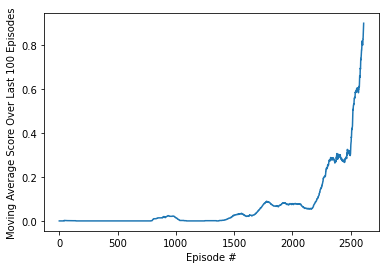

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(moving_avg_scores)), moving_avg_scores)
plt.ylabel('Moving Average Score Over Last 100 Episodes')
plt.xlabel('Episode #')
plt.show()

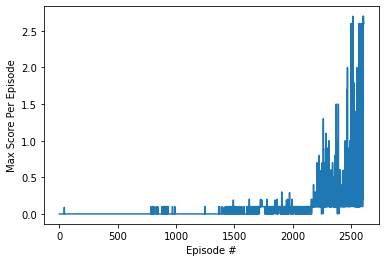

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_max)), scores_max)
plt.ylabel('Max Score Per Episode')
plt.xlabel('Episode #')
plt.show()

## Load MADDPG Agent and Watch it in Action

In [ ]:
import torch
from maddpg_agents import MADDPG

# Load the Agents in memory from the weight files
maddpg_agents = MADDPG(state_size=state_size, action_size=action_size, random_seed=1, n_agents=num_agents)

# Load the weights to the networks
maddpg_agents.get(0).actor_local.load_state_dict(torch.load('agent0_actor.pth'))
maddpg_agents.get(0).critic_local.load_state_dict(torch.load('agent0_critic.pth'))

maddpg_agents.get(1).actor_local.load_state_dict(torch.load('agent1_actor.pth'))
maddpg_agents.get(1).critic_local.load_state_dict(torch.load('agent1_critic.pth'))

#Compute the max scores for 100 episodes
max_t = 1000
n_episodes = 3
scores_max = []                        # list containing scores from each episode
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    scores = np.zeros(num_agents)

    for _ in range(max_t):
        actions = maddpg_agents.act(states)

        env_info = env.step(actions)[brain_name]

        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        
        states = next_states
        scores += rewards
        if np.any(dones):
            scores_max.append(np.max(scores)) 
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, scores_max[-1]))
            break

In [7]:
env.close()